In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [274]:
co2_emissions = pd.read_csv('CO2_Emissions.csv')
co2_emissions.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.000000000000000,4,AS5,Z,9.900000000000000,6.700000000000000,8.500000000000000,33,196
1,ACURA,ILX,COMPACT,2.400000000000000,4,M6,Z,11.199999999999999,7.700000000000000,9.600000000000000,29,221
2,ACURA,ILX HYBRID,COMPACT,1.500000000000000,4,AV7,Z,6.000000000000000,5.800000000000000,5.900000000000000,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.500000000000000,6,AS6,Z,12.699999999999999,9.100000000000000,11.100000000000000,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.500000000000000,6,AS6,Z,12.100000000000000,8.699999999999999,10.600000000000000,27,244


In [275]:
co2_emissions.shape

(7385, 12)

In [276]:
co2_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [277]:
co2_emissions.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

- All the columns are in correct data type
- There are no null values in the dataset

In [278]:
co2_emissions.duplicated().sum()

1103

- There are 1103 duplicated rows, we need to drop duplicate rows

In [279]:
co2_emissions = co2_emissions.drop_duplicates(keep="first")
co2_emissions.shape

(6282, 12)

In [280]:
for c in co2_emissions.select_dtypes(include=['object']):
    print(c,co2_emissions[c].nunique())

Make 42
Model 2053
Vehicle Class 16
Transmission 27
Fuel Type 5


In [281]:
co2_emissions.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,6282.000000000000000,6282.000000000000000,6282.000000000000000,6282.000000000000000,6282.000000000000000,6282.000000000000000,6282.000000000000000
mean,3.161811524992040,5.618911174785100,12.610219675262654,9.070582617000953,11.017876472460999,27.411015600127350,251.157752308182097
std,1.365201322627847,1.846250491573830,3.553066308659997,2.278884321464437,2.946875663766868,7.245317652179628,59.290426441732635
min,0.900000000000000,3.000000000000000,4.200000000000000,4.000000000000000,4.100000000000000,11.000000000000000,96.000000000000000
25%,2.000000000000000,4.000000000000000,10.100000000000000,7.500000000000000,8.900000000000000,22.000000000000000,208.000000000000000
50%,3.000000000000000,6.000000000000000,12.100000000000000,8.699999999999999,10.600000000000000,27.000000000000000,246.000000000000000
75%,3.700000000000000,6.000000000000000,14.699999999999999,10.300000000000001,12.699999999999999,32.000000000000000,289.000000000000000
max,8.400000000000000,16.000000000000000,30.600000000000001,20.600000000000001,26.100000000000001,69.000000000000000,522.000000000000000


- All numeric columns doesn't have values <= 0, there are no null values too

In [282]:
co2_emissions['Make'].value_counts()

Make
FORD             577
CHEVROLET        515
BMW              501
MERCEDES-BENZ    365
PORSCHE          296
GMC              289
TOYOTA           276
AUDI             263
NISSAN           213
MINI             200
JEEP             200
KIA              192
VOLKSWAGEN       187
HYUNDAI          184
DODGE            180
HONDA            164
CADILLAC         141
LEXUS            129
MAZDA            127
SUBARU           119
JAGUAR           118
VOLVO            118
BUICK             92
INFINITI          87
LINCOLN           81
LAND ROVER        76
MITSUBISHI        73
RAM               72
CHRYSLER          64
FIAT              56
MASERATI          52
ACURA             51
ROLLS-ROYCE       48
ASTON MARTIN      39
LAMBORGHINI       37
BENTLEY           35
SCION             21
ALFA ROMEO        19
GENESIS           14
SMART              7
SRT                2
BUGATTI            2
Name: count, dtype: int64

- All car names are in correct format without any spelling mistake or redundancy

In [283]:
co2_emissions['Vehicle Class'].value_counts()

Vehicle Class
SUV - SMALL                 1006
MID-SIZE                     983
COMPACT                      903
SUV - STANDARD               613
SUBCOMPACT                   533
FULL-SIZE                    508
PICKUP TRUCK - STANDARD      475
TWO-SEATER                   381
MINICOMPACT                  274
STATION WAGON - SMALL        214
PICKUP TRUCK - SMALL         133
VAN - PASSENGER               66
SPECIAL PURPOSE VEHICLE       65
MINIVAN                       61
STATION WAGON - MID-SIZE      45
VAN - CARGO                   22
Name: count, dtype: int64

In [284]:
co2_emissions['Transmission'].value_counts()

Transmission
AS6     1139
AS8     1056
M6       773
A6       684
AM7      383
A8       378
AS7      283
A9       263
AV       241
M5       168
AS10     151
AM6      107
AV7       92
AV6       89
A5        78
M7        78
AS9       65
A4        61
AM8       45
A7        44
AV8       34
A10       28
AS5       26
AV10       9
AM5        4
AS4        2
AM9        1
Name: count, dtype: int64

In [285]:
co2_emissions['Fuel Type'].value_counts()

Fuel Type
X    3039
Z    2765
E     330
D     147
N       1
Name: count, dtype: int64

- Replaced codes X, Z, D, E, N with their names for better readability

In [286]:
co2_emissions.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.000000000000000,4,AS5,Z,9.900000000000000,6.700000000000000,8.500000000000000,33,196
1,ACURA,ILX,COMPACT,2.400000000000000,4,M6,Z,11.199999999999999,7.700000000000000,9.600000000000000,29,221
2,ACURA,ILX HYBRID,COMPACT,1.500000000000000,4,AV7,Z,6.000000000000000,5.800000000000000,5.900000000000000,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.500000000000000,6,AS6,Z,12.699999999999999,9.100000000000000,11.100000000000000,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.500000000000000,6,AS6,Z,12.100000000000000,8.699999999999999,10.600000000000000,27,244


In [287]:
co2_emissions.Model.nunique()

2053

### <font color = 'Red'>2. Examine the dataset for any inconsistencies, missing entries, or data quality issues. Consider what preprocessing steps may be necessary to make the dataset ready for meaningful analysis. </font>

- The Model column (2053 unique values) is highly redundant with Vehicle Class, as most models belong to a single class, so the vehicle class already captures the majority of the structural and functional information relevant to CO₂ emissions. Keeping it would greatly increase dimensionality without adding significant predictive value. Dropping it simplifies the pipeline, reduces overfitting risk, and retains essential information through other features.
- One hot encoding should be done for Make, Vehicle Class, Fuel Type, Transmission
- Replace code present in fuel type column with Actual fuel type name for interpretability
- Standardise the numerical columns Engine size, Cylinders, Fuel Consumption city, Fuel Consumption Hwy, Fuel Consumption Comb, Fuel Consumption Comb mpg, CO2 emissions

### <font color='Red'> 3. Study the relationships between various vehicle features and CO₂ emissions. Which attributes appear to have stronger influence on emission levels? Use suitable methods to support your reasoning.</font>

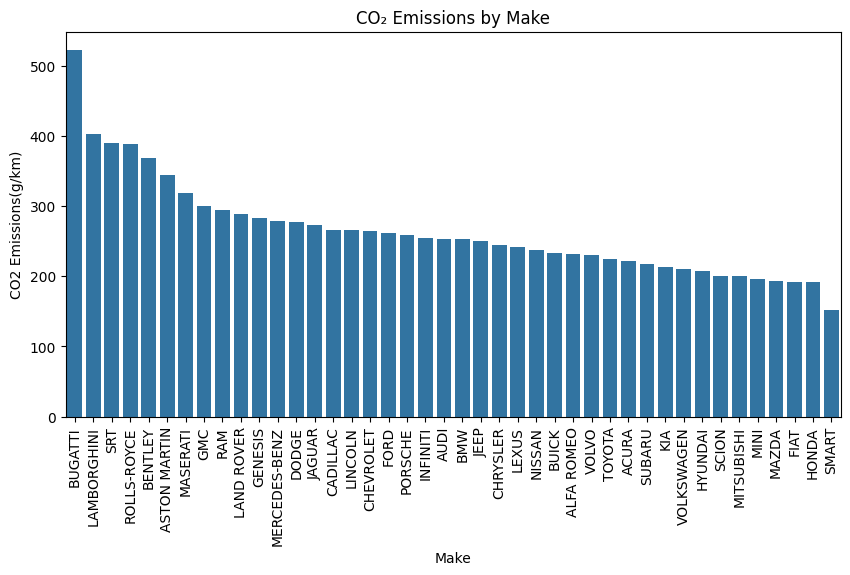

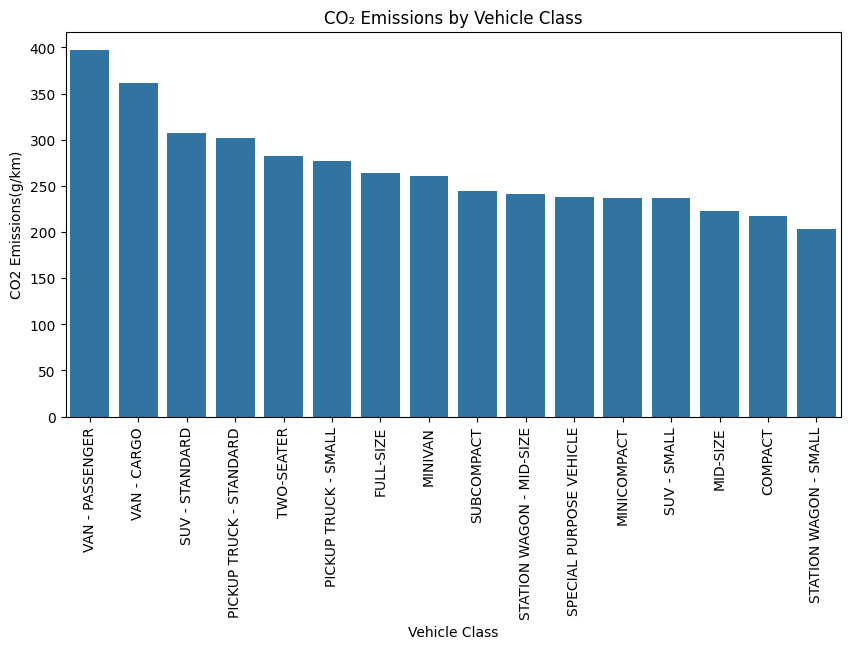

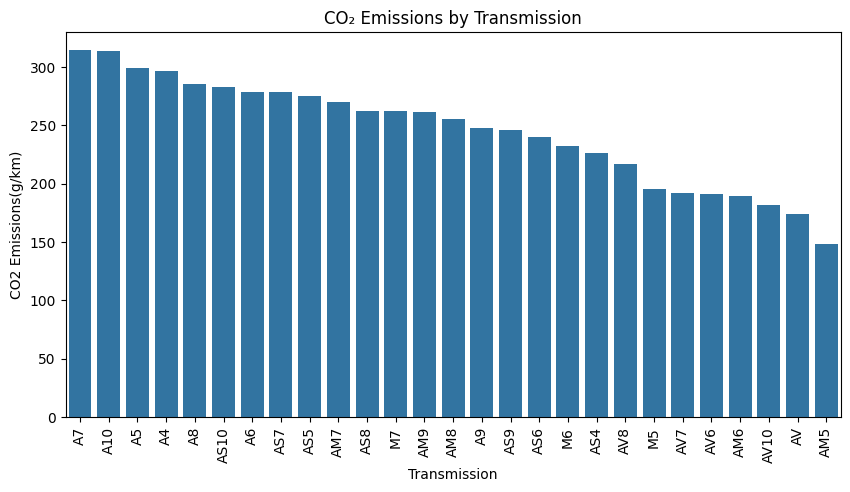

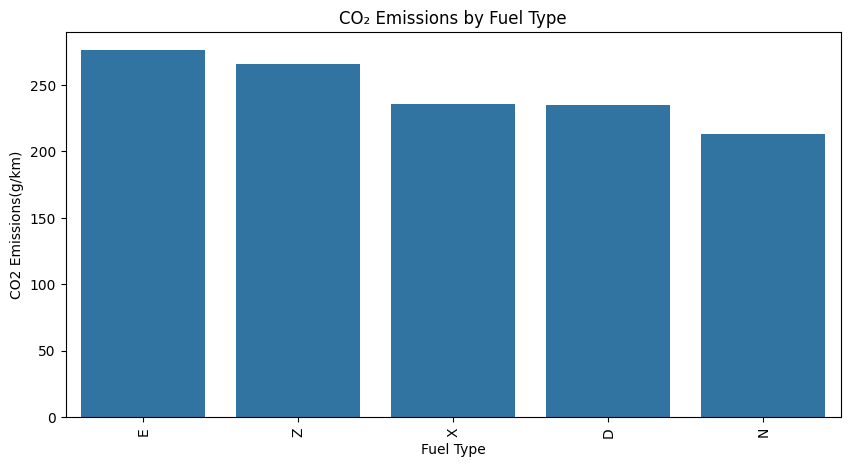

In [288]:
categorical_features = ['Make','Vehicle Class', 'Transmission', 'Fuel Type']

for col in categorical_features:
    col_avg_co2_emissions = co2_emissions.groupby(col)['CO2 Emissions(g/km)'].mean().reset_index().sort_values(by='CO2 Emissions(g/km)',ascending=False)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=col, y='CO2 Emissions(g/km)', data=col_avg_co2_emissions)
    plt.xticks(rotation=90)
    plt.title(f'CO₂ Emissions by {col}')
    plt.show()

- **Make** - High-performance and luxury brands (Bugatti, Lamborghini, Bentley, Rolls-Royce) show substantially higher CO₂ emissions due to large, high-power engines.
In contrast, efficiency-focused manufacturers (Honda, Hyundai, Mazda) produce lower-emission vehicles.
- **Vehicle Class** - One of the strongest categorical influences — larger and heavier vehicles such as SUVs, Vans, and Pickup Trucks emit significantly more CO₂, whereas compact and subcompact cars are much more fuel-efficient.
- **Transmission** - Vehicles with traditional automatic transmissions (A4–A7) tend to emit more CO₂, while modern systems like automated manuals (AM5) and CVTs (AV, AV10) show reduced emissions, reflecting efficiency improvements through technology.
- **Fuel Type** - Regular Gasoline (X) And Diesel vehicles exhibit the lowest average CO2 emissions, reflecting higher efficiency. In contrast, Ethanol and Premium Gasoline vehicles tend to emit more CO₂ on average. While the single Natural Gas entry is insufficient for analysis.

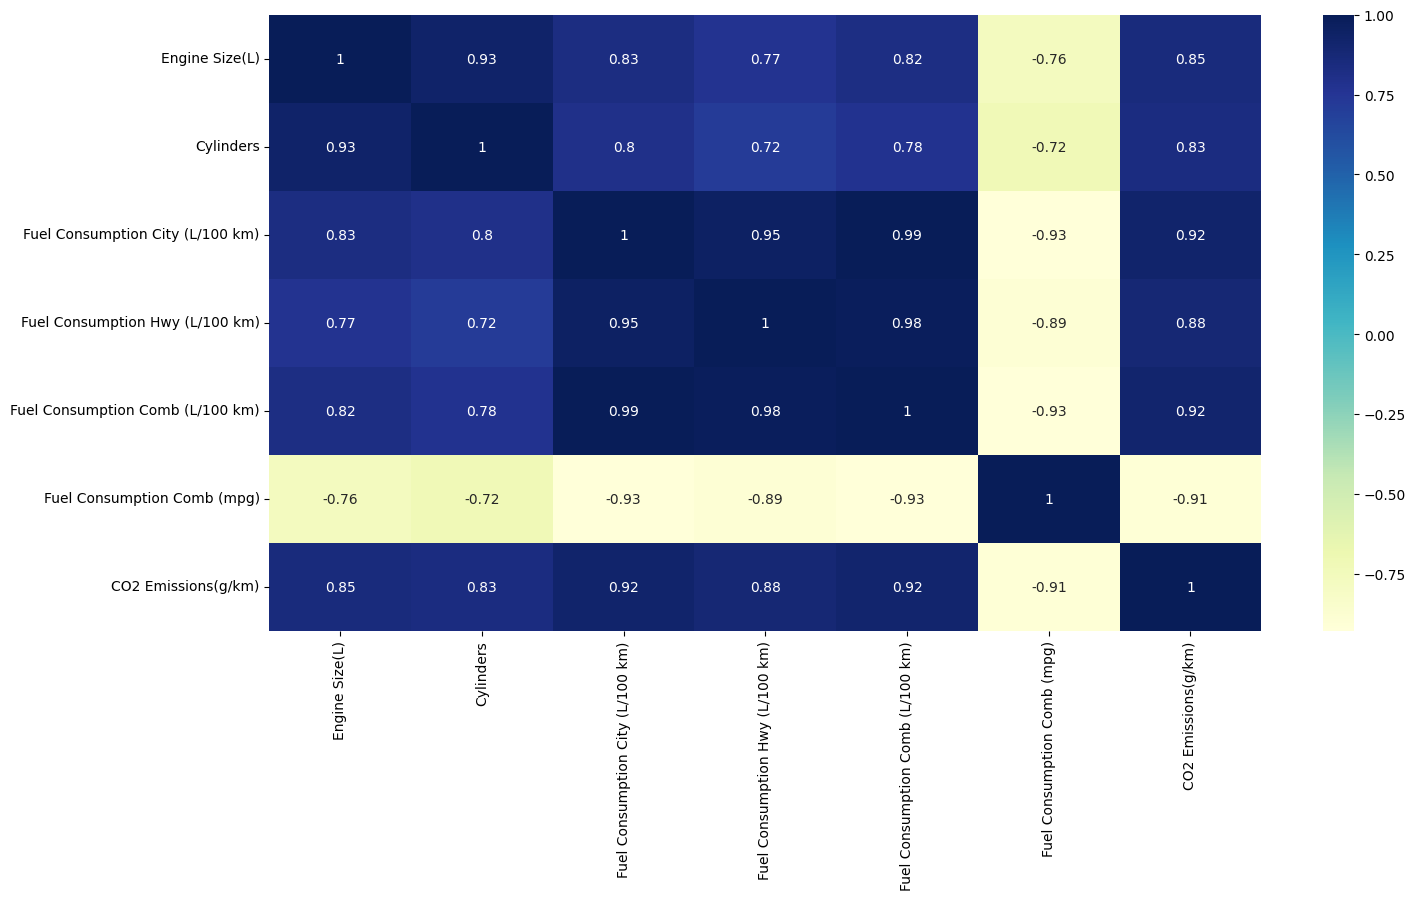

In [289]:
car_numeric = co2_emissions.select_dtypes(include=['float64','int64'])
corr_matrix = car_numeric.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

- The heatmap reveals that fuel consumption variables show the strongest influence on CO₂ emission levels, with correlation coefficients around 0.9–0.92.
Specifically, Fuel Consumption Comb (L/100 km) is the most representative predictor of CO₂ emissions, as it captures both city and highway efficiency.
Engine Size (L) and Cylinders also exhibit strong positive correlations (~0.83–0.85), indicating that larger and multi-cylinder engines produce higher CO₂ emissions.
Conversely, Fuel Consumption Comb (mpg) has a strong negative correlation (−0.91), reaffirming the inverse relationship between fuel efficiency and emissions.

- Overall, fuel consumption efficiency is the primary driver of CO₂ emissions, supported by strong linear correlations with numeric features.
Among categorical factors, Vehicle Class and Fuel Type exert the strongest influence, followed by Transmission and Make.

In [290]:
co2_emissions.Transmission.nunique()

27

### <font color='Red'> 4. Create visual summaries that reveal how emission levels change with respect to different numerical variables in the dataset. Focus on uncovering patterns or trends that might not be immediately visible.</font>

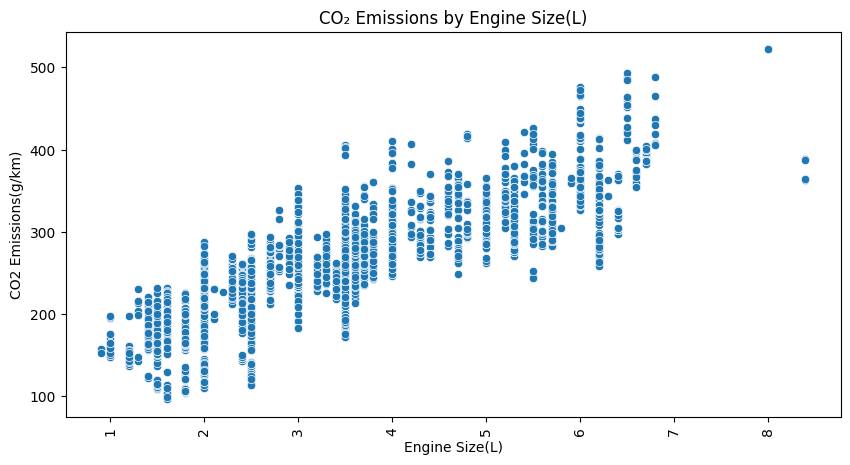

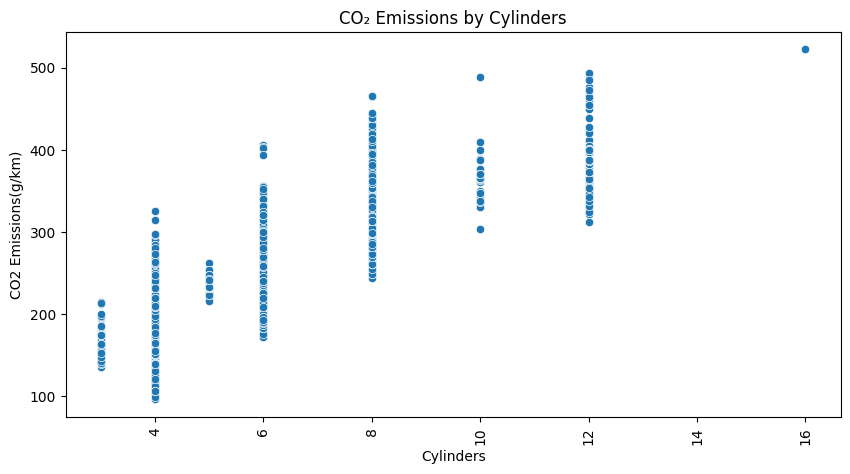

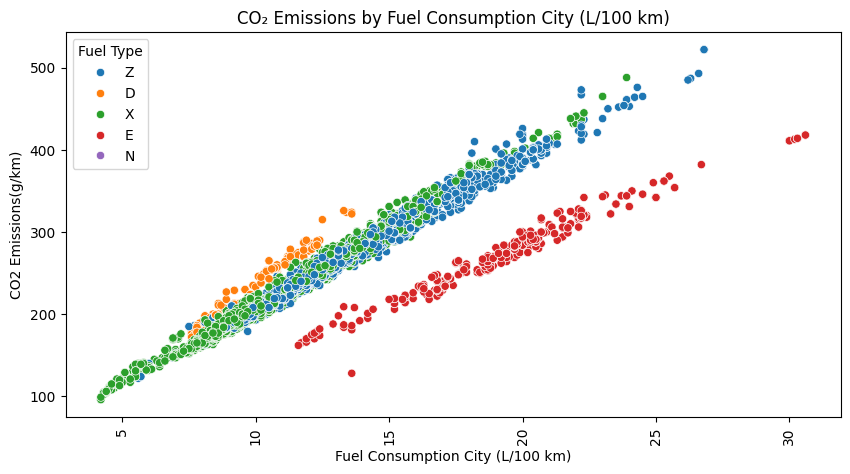

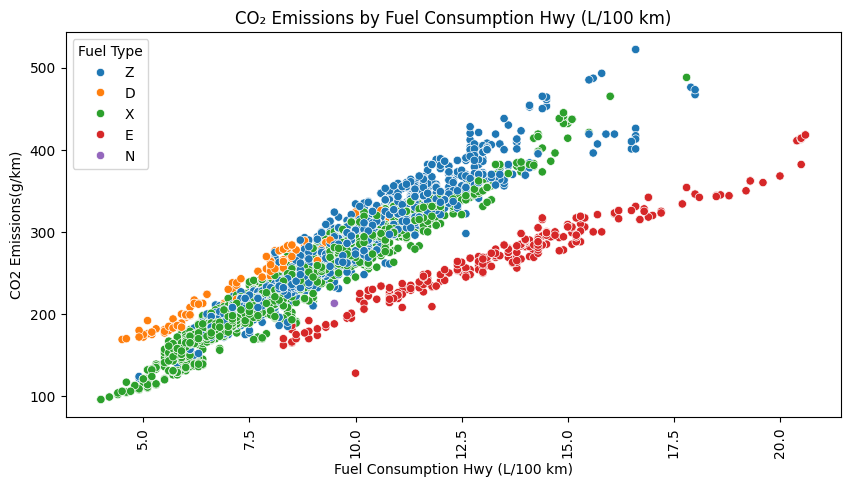

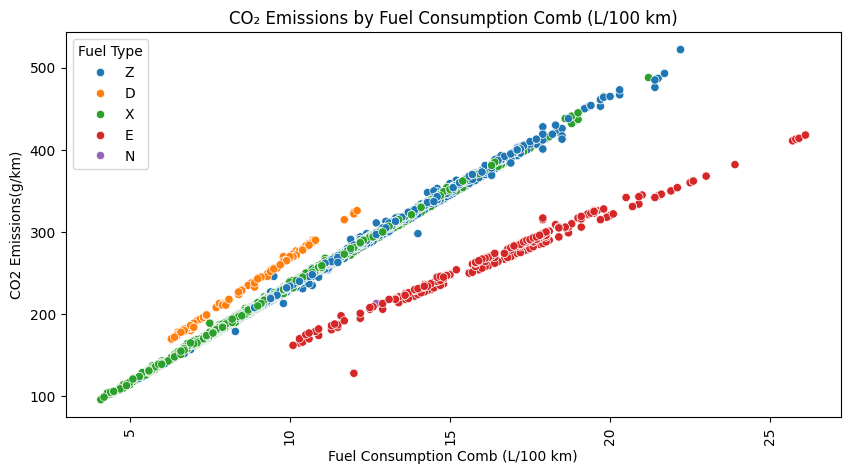

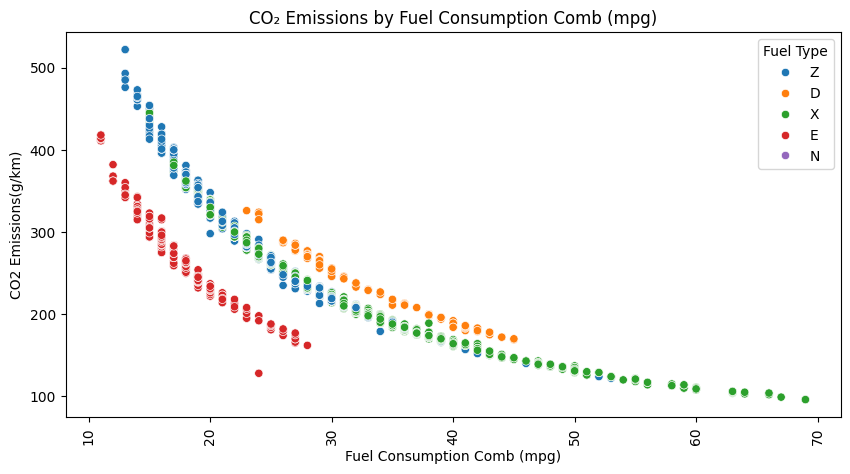

In [291]:
numeric_columns = ['Engine Size(L)', 'Cylinders',
       'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)']
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    if col in ['Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)']:
       sns.scatterplot(x=col, y='CO2 Emissions(g/km)', data=co2_emissions,hue='Fuel Type')
    else:
       sns.scatterplot(x=col, y='CO2 Emissions(g/km)', data=co2_emissions)
    plt.xticks(rotation=90)
    plt.title(f'CO₂ Emissions by {col}')
    plt.show()

- **Engine Size(L)** - CO₂ emissions increase significantly with engine size. Vehicles with larger engines are less fuel-efficient and emit higher CO₂ per kilometer due to higher fuel combustion rates.
- **Cylinders** - CO₂ emissions rise with the number of cylinders. Engines with more cylinders are designed for higher performance, but at the cost of efficiency, leading to greater CO₂ emissions.
- **Fuel Consumption City, Hwy, Comb (L/100km)** - CO₂ emissions are directly proportional to a vehicle’s fuel consumption across all driving modes, with the combined fuel consumption (L/100 km) showing the strongest and most consistent correlation.
This linear relationship demonstrates that fuel efficiency is the primary determinant of CO₂ emissions, and improving it—especially in city driving—can substantially reduce a vehicle’s environmental footprint.
We can see seperate linear lines in the scatterplot because each fuel type can have different CO2 emission per L
- **Fuel Consumption Comb (mpg)** - The relationship between fuel consumption (mpg) and CO₂ emissions is strongly nonlinear, violating the linearity assumption of linear regression. This occurs because mpg is inversely proportional to fuel consumption (L/100 km). If mpg were to be retained, a polynomial transformation would be required.
Check VIF and drop high VIF columns and then If MPG is still present then we can use polynomial transformation.

### <font color='Red'>5. Compare emission levels across different vehicle types or fuel categories. Identify any clear distinctions or surprising findings that emerge. </font>

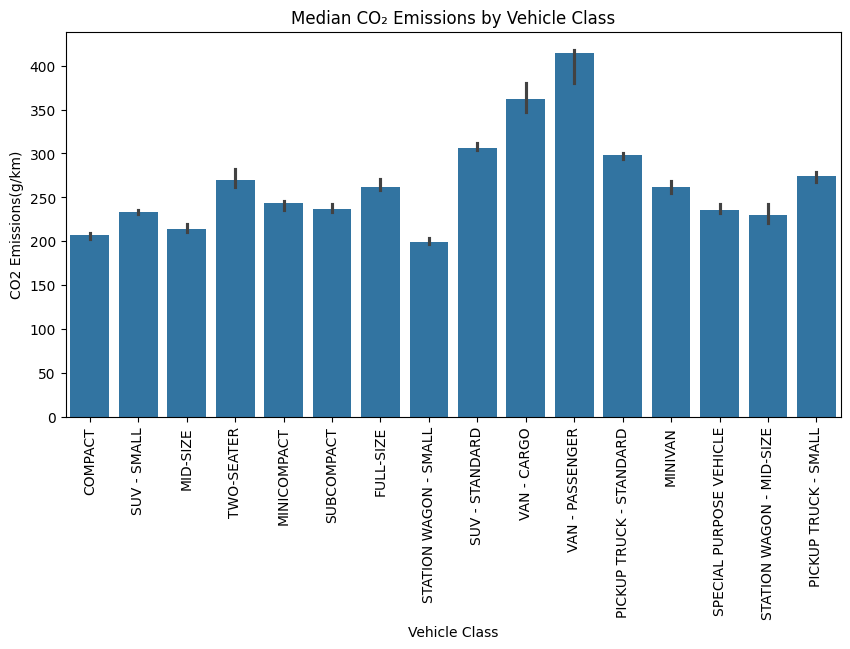

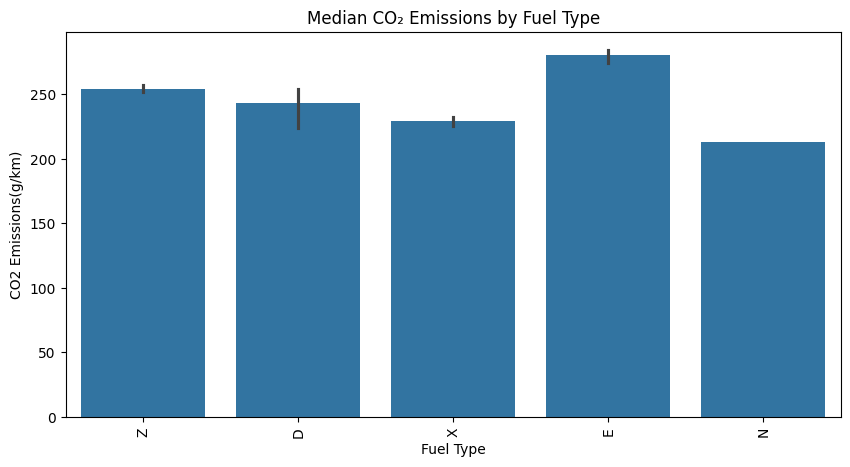

In [292]:
categorical_features = ['Vehicle Class','Fuel Type']

for col in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=col, y='CO2 Emissions(g/km)', data=co2_emissions,estimator='median')
    plt.xticks(rotation=90)
    plt.title(f'Median CO₂ Emissions by {col}')
    plt.show()

- Fuel Type significantly influences CO₂ emissions, with Ethanol and Premium fuels tending toward higher emissions, while Regular Gasoline and Diesel offer relatively cleaner performance.
- Vehicle Class strongly determines emission levels — larger, heavier vehicles (SUVs, Vans, Trucks) emit significantly more CO₂, while compact and mid-size vehicles remain more fuel-efficient and environmentally friendly.
- Across all analyses, Vehicle Class and Fuel Type emerge as strong categorical determinants of CO₂ emissions.
Larger, performance-oriented vehicles and high-performance fuels are consistently associated with higher emission levels, while compact cars using regular or diesel fuels are the most environmentally efficient.

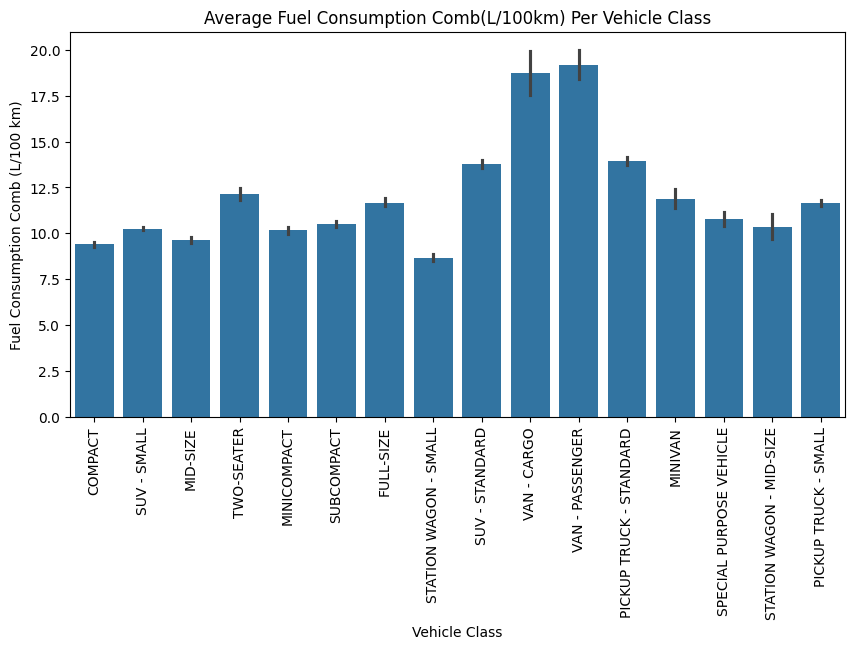

In [293]:
plt.figure(figsize=(10, 5))
sns.barplot(data=co2_emissions,x='Vehicle Class',y= 'Fuel Consumption Comb (L/100 km)',estimator='mean')
plt.xticks(rotation = 90)
plt.title('Average Fuel Consumption Comb(L/100km) Per Vehicle Class')
plt.show()

- Larger the vehicle more the fuel consumption comb (L/100km), larger the fuel consumption more CO2 emission.

### <font color='Red'>6. Observe if there are any vehicles that produce unusually high or low emissions compared to others with similar characteristics. Reflect on what could explain such deviations. </font>

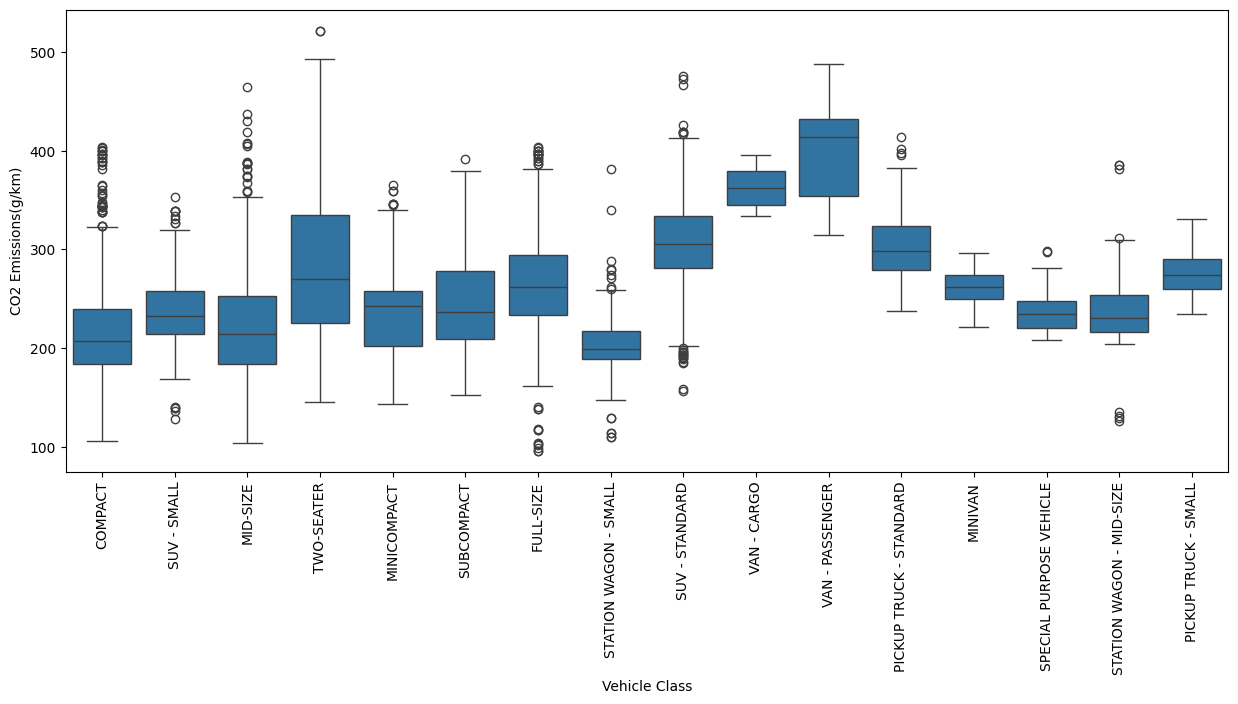

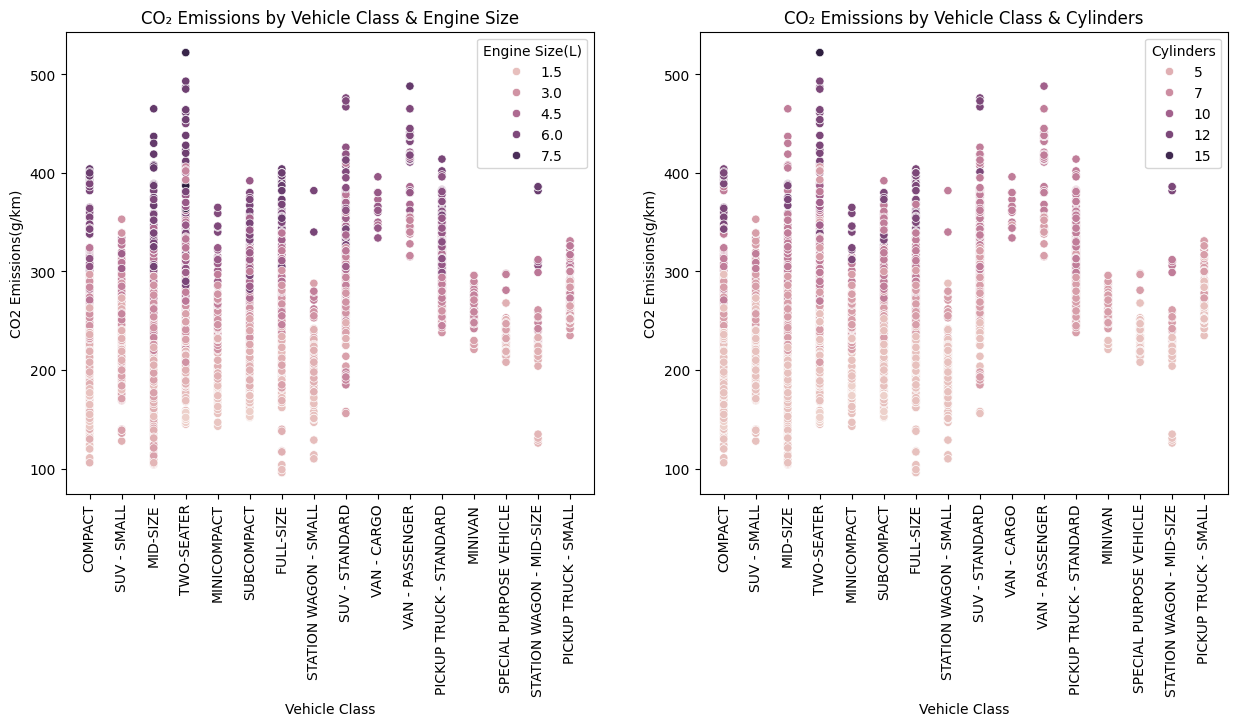

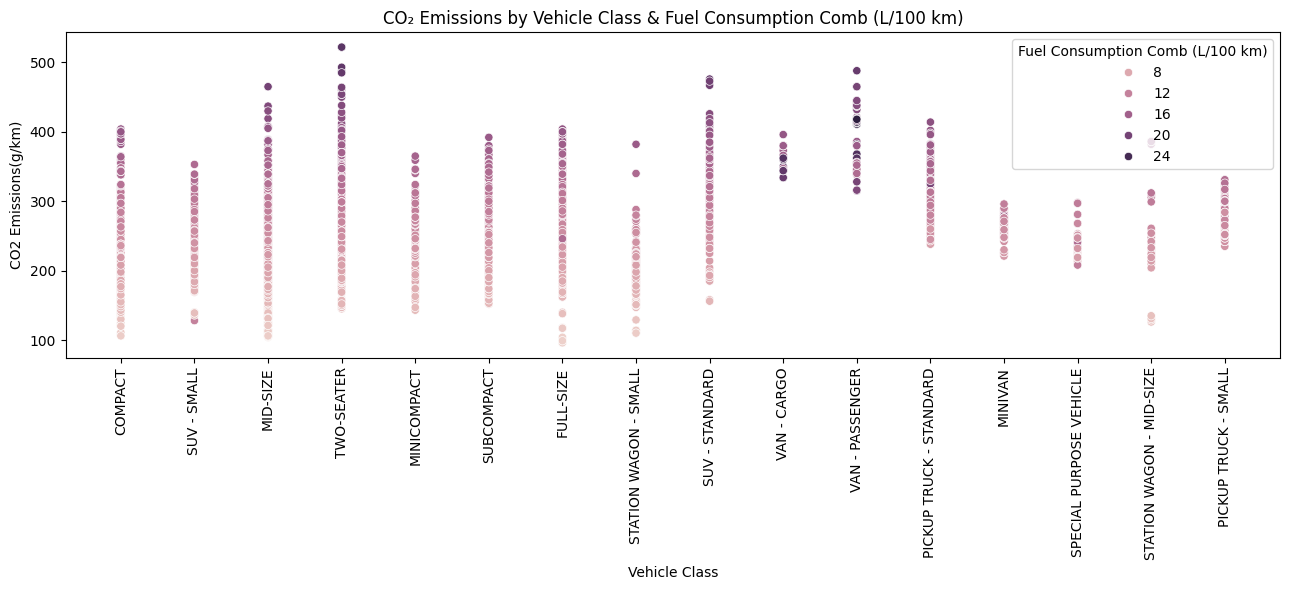

In [294]:
# First row: CO₂ Emissions by Vehicle Class (no hue)
plt.figure(figsize=(15, 6))
sns.boxplot(
    x='Vehicle Class',
    y='CO2 Emissions(g/km)',
    data=co2_emissions,
)
plt.xticks(rotation=90)
plt.show()

# Second row: CO₂ Emissions by Vehicle Class & Engine Size
fig2, axes2 = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(
    x='Vehicle Class', 
    y='CO2 Emissions(g/km)', 
    hue='Engine Size(L)', 
    data=co2_emissions,
    ax=axes2[0]
)
axes2[0].set_title('CO₂ Emissions by Vehicle Class & Engine Size')
axes2[0].tick_params(axis='x', rotation=90)

# Second row: CO₂ Emissions by Vehicle Class & Cylinders
sns.scatterplot(
    x='Vehicle Class', 
    y='CO2 Emissions(g/km)', 
    hue='Cylinders', 
    data=co2_emissions,
    ax=axes2[1]
)
axes2[1].set_title('CO₂ Emissions by Vehicle Class & Cylinders')
axes2[1].tick_params(axis='x', rotation=90)

# Third row: CO₂ Emissions by Vehicle Class & Fuel Consumption Comb (L/100 km)
fig3, ax3 = plt.subplots(1, 1, figsize=(13, 6))
sns.scatterplot(
    x='Vehicle Class', 
    y='CO2 Emissions(g/km)', 
    hue='Fuel Consumption Comb (L/100 km)', 
    data=co2_emissions,
    ax=ax3
)
ax3.set_title('CO₂ Emissions by Vehicle Class & Fuel Consumption Comb (L/100 km)')
ax3.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

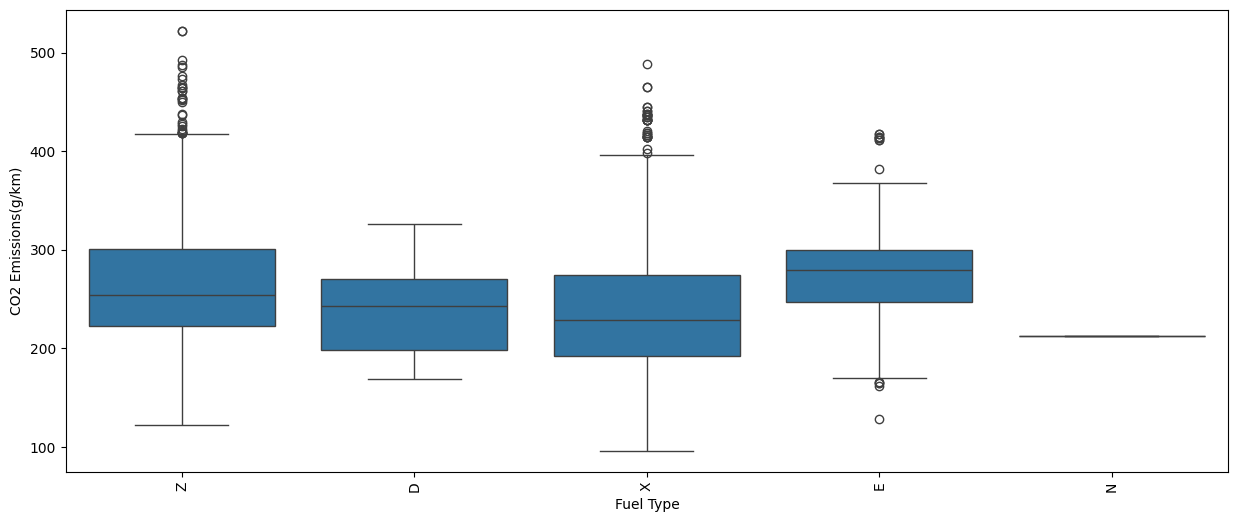

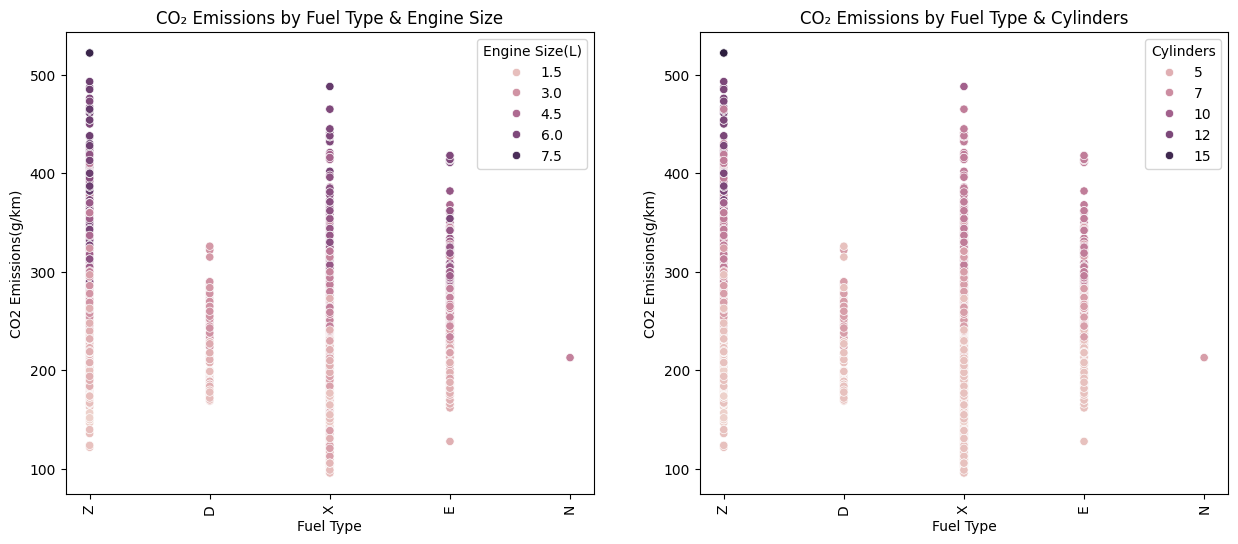

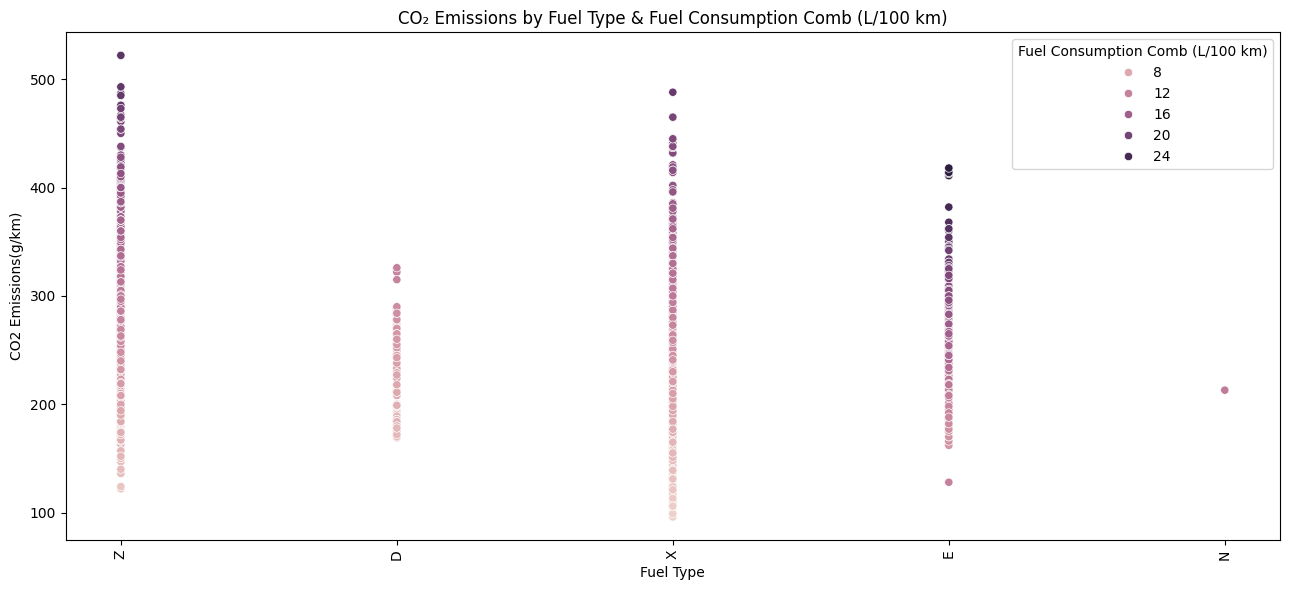

In [295]:
plt.figure(figsize=(15, 6))
sns.boxplot(
    x='Fuel Type',
    y='CO2 Emissions(g/km)',
    data=co2_emissions,
)
plt.xticks(rotation=90)
plt.show()

# Second row: CO₂ Emissions by Fuel Type & Engine Size
fig2, axes2 = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(
    x='Fuel Type', 
    y='CO2 Emissions(g/km)', 
    hue='Engine Size(L)', 
    data=co2_emissions,
    ax=axes2[0]
)
axes2[0].set_title('CO₂ Emissions by Fuel Type & Engine Size')
axes2[0].tick_params(axis='x', rotation=90)

# Second row: CO₂ Emissions by Fuel Type & Cylinders
sns.scatterplot(
    x='Fuel Type', 
    y='CO2 Emissions(g/km)', 
    hue='Cylinders', 
    data=co2_emissions,
    ax=axes2[1]
)
axes2[1].set_title('CO₂ Emissions by Fuel Type & Cylinders')
axes2[1].tick_params(axis='x', rotation=90)

# Third row: CO₂ Emissions by Fuel Type & Fuel Consumption Comb (L/100 km)
fig3, ax3 = plt.subplots(1, 1, figsize=(13, 6))
sns.scatterplot(
    x='Fuel Type', 
    y='CO2 Emissions(g/km)', 
    hue='Fuel Consumption Comb (L/100 km)', 
    data=co2_emissions,
    ax=ax3
)
ax3.set_title('CO₂ Emissions by Fuel Type & Fuel Consumption Comb (L/100 km)')
ax3.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

- **High-Emission Outliers**

- Vehicles that emit significantly higher CO₂ levels within the same class or fuel type are primarily associated with:
  - Larger engine sizes and higher cylinder counts (as confirmed by the scatter plots).
  - Performance-oriented or luxury models such as sports cars, SUVs, and full-size vehicles.
    These vehicles are often tuned for higher power output and acceleration, resulting in greater fuel consumption per kilometer which indeed leads to higher CO2 Emissions.
  - For example: Compact, Two-Seater, SUV–Standard categories show multiple high-emission outliers with darker points (indicating large engine sizes or 8–12 cylinders).
  - Such deviations are expected, as larger engines require more fuel combustion to deliver higher performance, directly increasing CO₂ output.

- **Low-Emission Outliers**
    - Conversely, vehicles with unusually low emissions within their class or fuel type are often: Equipped with smaller or turbocharged engines and less cylinders, achieving better fuel efficiency.
    - Represented by lighter-colored points in the scatterplots, generally below 200 g/km.

### <font color='Red'> 7. Prepare the dataset for model building by ensuring that numerical and categorical features are appropriately represented. Consider any transformations or encodings that may improve interpretability. </font>

1. Preprocessing - one hot encoding, standardization, replace fuel type codes, drop models, VIF to eliminate multicollinearity

- Replace fuel type code with fuel type name for readability and interpretability

In [296]:
def clean_fuel_type(fuel):
    if fuel == 'X':
        return 'Regular gasoline'
    elif fuel == 'Z':
        return 'Premium gasoline'
    elif fuel == 'D':
        return 'Diesel'
    elif fuel == 'E':
        return 'Ethanol'
    elif fuel == 'N':
        return 'Natural gas'
    else:
        return 'Others'

co2_emissions['Fuel Type'] = co2_emissions['Fuel Type'].apply(clean_fuel_type)
co2_emissions['Fuel Type'].head()

0    Premium gasoline
1    Premium gasoline
2    Premium gasoline
3    Premium gasoline
4    Premium gasoline
Name: Fuel Type, dtype: object

- Since The relation between Fuel Consumption Comb (mpg) and CO2 Emissions was not linear we need to try different polynomial degrees

   Degree          Train_R2           Test_R2
0       1 0.822043357322460 0.821996784972211
1       2 0.873700404908932 0.877680843993483
2       3 0.874019531410553 0.877977836053358
3       4 0.875823807325157 0.880657264598321
4       5 0.877378358947925 0.882825197138175


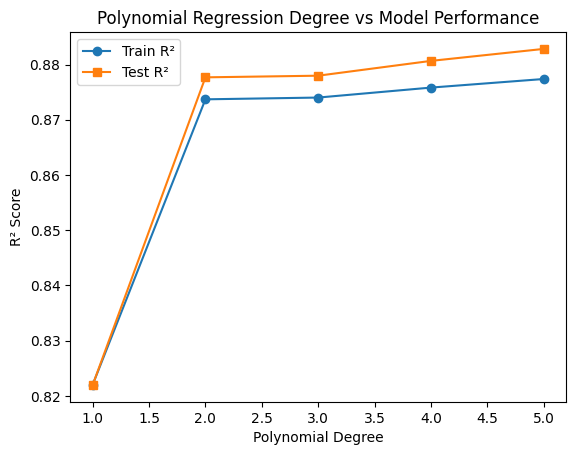

In [297]:
from sklearn.metrics import r2_score

# Independent & dependent variables
X = co2_emissions[['Fuel Consumption Comb (mpg)']]
y = co2_emissions['CO2 Emissions(g/km)']

# Split into training and testing (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Range of polynomial degrees to test
degrees = [1, 2, 3, 4, 5]

# Store R2 scores
train_r2 = []
test_r2 = []

for d in degrees:
    # Generate polynomial features
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Fit linear regression
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # R2 scores
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))

# Display results
r2_df = pd.DataFrame({'Degree': degrees, 'Train_R2': train_r2, 'Test_R2': test_r2})
print(r2_df)

# Visualization
plt.plot(degrees, train_r2, marker='o', label='Train R²')
plt.plot(degrees, test_r2, marker='s', label='Test R²')
plt.xlabel("Polynomial Degree")
plt.ylabel("R² Score")
plt.title("Polynomial Regression Degree vs Model Performance")
plt.legend()
plt.show()

- We can conclude that 2 is the best degree as the model R2 for both test and training score got stagnant after 2

- Adding Polynomials for fuel consumption comb (mpg) of degree 2

In [298]:
# Identify the column to apply polynomial transformation
mpg_col = 'Fuel Consumption Comb (mpg)'

# Create a polynomial transformer (degree=2, no bias term)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit-transform only the mpg column
mpg_poly = poly.fit_transform(co2_emissions[[mpg_col]])

# Create a DataFrame with the new polynomial features
mpg_poly_df = pd.DataFrame(mpg_poly, columns=['Fuel Consumption Comb (mpg)', 'Fuel Consumption Comb (mpg)^2'])

# Drop the original Fuel Consumption Comb (mpg) column from X
co2_emissions.drop(columns=[mpg_col],inplace=True)

# Concatenate the new polynomial features with the rest of X
co2_emissions = pd.concat([co2_emissions.reset_index(drop=True), mpg_poly_df], axis=1)

co2_emissions.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Fuel Consumption Comb (mpg),Fuel Consumption Comb (mpg)^2
0,ACURA,ILX,COMPACT,2.000000000000000,4,AS5,Premium gasoline,9.900000000000000,6.700000000000000,8.500000000000000,196,33.000000000000000,1089.000000000000000
1,ACURA,ILX,COMPACT,2.400000000000000,4,M6,Premium gasoline,11.199999999999999,7.700000000000000,9.600000000000000,221,29.000000000000000,841.000000000000000
2,ACURA,ILX HYBRID,COMPACT,1.500000000000000,4,AV7,Premium gasoline,6.000000000000000,5.800000000000000,5.900000000000000,136,48.000000000000000,2304.000000000000000
3,ACURA,MDX 4WD,SUV - SMALL,3.500000000000000,6,AS6,Premium gasoline,12.699999999999999,9.100000000000000,11.100000000000000,255,25.000000000000000,625.000000000000000
4,ACURA,RDX AWD,SUV - SMALL,3.500000000000000,6,AS6,Premium gasoline,12.100000000000000,8.699999999999999,10.600000000000000,244,27.000000000000000,729.000000000000000


- One hot encoding - Categorical Columns

In [299]:
co2_emissions = pd.get_dummies(data=co2_emissions ,columns=['Make','Vehicle Class','Transmission','Fuel Type'],drop_first=True)
co2_emissions.head()

,Model,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Fuel Consumption Comb (mpg),Fuel Consumption Comb (mpg)^2,Make_ALFA ROMEO,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_Ethanol,Fuel Type_Natural gas,Fuel Type_Premium gasoline,Fuel Type_Regular gasoline
0,ILX,2.000000000000000,4,9.900000000000000,6.700000000000000,8.500000000000000,196,33.000000000000000,1089.000000000000000,False,...,False,False,False,False,False,False,False,False,True,False
1,ILX,2.400000000000000,4,11.199999999999999,7.700000000000000,9.600000000000000,221,29.000000000000000,841.000000000000000,False,...,False,False,False,False,True,False,False,False,True,False
2,ILX HYBRID,1.500000000000000,4,6.000000000000000,5.800000000000000,5.900000000000000,136,48.000000000000000,2304.000000000000000,False,...,False,True,False,False,False,False,False,False,True,False
3,MDX 4WD,3.500000000000000,6,12.699999999999999,9.100000000000000,11.100000000000000,255,25.000000000000000,625.000000000000000,False,...,False,False,False,False,False,False,False,False,True,False
4,RDX AWD,3.500000000000000,6,12.100000000000000,8.699999999999999,10.600000000000000,244,27.000000000000000,729.000000000000000,False,...,False,False,False,False,False,False,False,False,True,False


- Standardizing Numerical Columns

In [300]:
numeric_columns = co2_emissions.select_dtypes(include=['float64','int64']).columns
scaler = StandardScaler()
co2_emissions[numeric_columns] = scaler.fit_transform(co2_emissions[numeric_columns])
co2_emissions.head()

,Model,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Fuel Consumption Comb (mpg),Fuel Consumption Comb (mpg)^2,Make_ALFA ROMEO,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_Ethanol,Fuel Type_Natural gas,Fuel Type_Premium gasoline,Fuel Type_Regular gasoline
0,ILX,-0.851086201165638,-0.876934116321554,-0.762844027857400,-1.040321045594652,-0.854490378199558,-0.930371837167502,0.771454001395296,0.625147730747012,False,...,False,False,False,False,False,False,False,False,True,False
1,ILX,-0.558065798851599,-0.876934116321554,-0.396933749341504,-0.601474899447351,-0.481183972464408,-0.508685039648429,0.219329360351120,0.081445597869503,False,...,False,False,False,False,True,False,False,False,True,False
2,ILX HYBRID,-1.217361704058187,-0.876934116321554,-1.860574863405091,-1.435282577127224,-1.736850973573548,-1.942420151213277,2.841921405310952,3.288849712384810,False,...,False,True,False,False,False,False,False,False,True,False
3,MDX 4WD,0.247740307512010,0.206428738886313,0.025270418176838,0.012909705158871,0.027870217174433,0.064809004977510,-0.332795280693055,-0.392101421088328,False,...,False,False,False,False,False,False,False,False,True,False
4,RDX AWD,0.247740307512010,0.206428738886313,-0.143611248830499,-0.162628753300050,-0.141814512705181,-0.120733185930882,-0.056732960170967,-0.164097300849373,False,...,False,False,False,False,False,False,False,False,True,False


### <font color='Red'> 8. Develop a simple, interpretable model to estimate CO₂ emissions using relevant features from the dataset. Summarize how the model captures the relationship between vehicle characteristics and emissions. </font>

In [301]:
X = co2_emissions.drop(['Model','CO2 Emissions(g/km)'],axis=1)
Y = co2_emissions['CO2 Emissions(g/km)']

- Train Test Split

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [303]:
X_train.shape,X_test.shape

((4397, 93), (1885, 93))

- Model Building

In [304]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [305]:
training_r2_score = model.score(X_train,y_train)
test_r2_score = model.score(X_test,y_test)
print('Training Score: ',training_r2_score)
print('Test Score: ',test_r2_score)

Training Score:  0.9945418626454711
Test Score:  0.9920123356135196


In [306]:
# Create a DataFrame mapping features to coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})
# Sort by absolute coefficient value (for importance)
coef_df['Abs(Coefficient)'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs(Coefficient)', ascending=False)

coef_df.head(10)


,Feature,Coefficient,Abs(Coefficient)
89,Fuel Type_Ethanol,-2.337639011265126,2.337639011265126
5,Fuel Consumption Comb (mpg),-0.673786932465421,0.673786932465421
12,Make_BUGATTI,0.619902430773368,0.619902430773368
92,Fuel Type_Regular gasoline,-0.536822574859961,0.536822574859961
91,Fuel Type_Premium gasoline,-0.528239949814299,0.528239949814299
2,Fuel Consumption City (L/100 km),0.431928211069775,0.431928211069775
6,Fuel Consumption Comb (mpg)^2,0.376523545029431,0.376523545029431
3,Fuel Consumption Hwy (L/100 km),0.243216360188621,0.243216360188621
28,Make_LAMBORGHINI,0.186514727848738,0.186514727848738
40,Make_ROLLS-ROYCE,0.173315186945613,0.173315186945613


- Since Multicollinearity affects the interpretability of each feature, checking for multicollinearity and eliminating columns which are having VIF >= 10

In [307]:
def calculate_VIF_Eliminate_Highest(X,vif_thres=10):
    dropped_columns = []
    numerical_columns = X.select_dtypes(include=['float64','int64'])
    while True:
        vif_data = pd.DataFrame()
        vif_data['Feature'] = numerical_columns.columns
        vif_data['VIF'] = [variance_inflation_factor(numerical_columns.values, i) for i in range(numerical_columns.shape[1])] 
        vif_data = vif_data.sort_values(by='VIF',ascending=False)
        if vif_data.iloc[0]['VIF'] < vif_thres:
            break
        dropped_columns.append(vif_data.iloc[0]['Feature'])
        numerical_columns = numerical_columns.drop(vif_data.iloc[0]['Feature'],axis=1)
    return vif_data,dropped_columns


In [308]:
vif_data,dropped_columns = calculate_VIF_Eliminate_Highest(X,vif_thres=10)
print(vif_data)
print("Dropped Columns: ",dropped_columns)

                           Feature               VIF
0                   Engine Size(L) 8.608893466994010
1                        Cylinders 7.297603678657305
2  Fuel Consumption Hwy (L/100 km) 3.715207324343383
3    Fuel Consumption Comb (mpg)^2 2.784248068570130
Dropped Columns:  ['Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'Fuel Consumption City (L/100 km)']


In [309]:
X.drop(dropped_columns,axis=1,inplace=True)
X.head()

,Engine Size(L),Cylinders,Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (mpg)^2,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,Make_BUGATTI,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_Ethanol,Fuel Type_Natural gas,Fuel Type_Premium gasoline,Fuel Type_Regular gasoline
0,-0.851086201165638,-0.876934116321554,-1.040321045594652,0.625147730747012,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,-0.558065798851599,-0.876934116321554,-0.601474899447351,0.081445597869503,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,-1.217361704058187,-0.876934116321554,-1.435282577127224,3.288849712384810,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,0.247740307512010,0.206428738886313,0.012909705158871,-0.392101421088328,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0.247740307512010,0.206428738886313,-0.162628753300050,-0.164097300849373,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [311]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [312]:
# Create a DataFrame mapping features to coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})
# Sort by absolute coefficient value (for importance)
coef_df['Abs(Coefficient)'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs(Coefficient)', ascending=False)

coef_df.drop('Abs(Coefficient)',axis=1).head(15)

,Feature,Coefficient
86,Fuel Type_Ethanol,-2.082365708910304
9,Make_BUGATTI,0.920075631809748
2,Fuel Consumption Hwy (L/100 km),0.764473100591735
7,Make_BENTLEY,0.560668665986090
89,Fuel Type_Regular gasoline,-0.521298519392789
70,Transmission_AM9,-0.498100745308378
88,Fuel Type_Premium gasoline,-0.482561164603903
25,Make_LAMBORGHINI,0.447871679517322
29,Make_MASERATI,0.360964557630786
37,Make_ROLLS-ROYCE,0.341971215167913


- Engine Size And Cylinders

In [313]:
coef_df.loc[coef_df['Feature'].str.contains('Engine|Cylinder',case=False),['Feature','Coefficient']]

,Feature,Coefficient
0,Engine Size(L),0.140747912080098
1,Cylinders,0.067078820268113


- Positive coefficients confirm what my EDA showed — vehicles with bigger engines and more cylinders emit higher CO₂ due to greater fuel consumption.

- Fuel Efficiency Variables

In [314]:
coef_df.loc[coef_df['Feature'].str.contains('Fuel Consumption',case=False),['Feature','Coefficient']]

,Feature,Coefficient
2,Fuel Consumption Hwy (L/100 km),0.764473100591735
3,Fuel Consumption Comb (mpg)^2,-0.174770284835356


- The model confirms the inverse relationship between mpg and CO₂ emissions that you observed earlier — more efficient vehicles emit less.
- The model also shows a strong positive relationship with highway fuel consumption (Fuel Consumption Hwy), which is consistent with the earlier EDA - More the fuel consumption more CO2 Emission

- Transmission Types

In [315]:
coef_df.loc[coef_df['Feature'].str.contains('Transmission',case=False),['Feature','Coefficient']]

,Feature,Coefficient
70,Transmission_AM9,-0.498100745308378
80,Transmission_AV6,-0.243755425254524
60,Transmission_A4,-0.225137937705669
82,Transmission_AV8,-0.211317960046422
85,Transmission_M7,0.104168471617004
81,Transmission_AV7,-0.103002651308544
72,Transmission_AS4,-0.091532009846699
79,Transmission_AV10,-0.072983531548007
63,Transmission_A7,0.063632490670686
65,Transmission_A9,0.057894793334282


- AM9 (−0.50) and CVT variants (AV6–AV10) show strong negative coefficients, implying these advanced systems lower emissions by maintaining optimal engine load and improving fuel efficiency.

- Older automatics (A4) also have mildly negative coefficients, likely due to pairing with smaller engines.

- Manual transmissions (M6, M7) and mid-range automatics (A5–A7) exhibit small positive coefficients, suggesting slightly higher CO₂ output caused by less efficient or driver-dependent gear control.

- Most sequential (AS series) transmissions have near-zero coefficients, indicating neutral or minimal impact on emissions.

**Conclusion:**
- Advanced transmissions — particularly AM9 and CVT types — are associated with lower CO₂ emissions, confirming that newer gear systems enhance efficiency, while manual and mid-tier automatics contribute to slightly higher emissions.

- Fuel Type

In [316]:
pd.options.display.float_format = '{:.15f}'.format

In [317]:
coef_df.loc[coef_df['Feature'].str.contains('Fuel Type',case=False),['Feature','Coefficient']]

,Feature,Coefficient
86,Fuel Type_Ethanol,-2.082365708910304
89,Fuel Type_Regular gasoline,-0.521298519392789
88,Fuel Type_Premium gasoline,-0.482561164603903
87,Fuel Type_Natural gas,0.000000000000003


- Ethanol vehicles emit less CO₂ than Diesel vehicles when comparing cars of similar size and specifications.
- Regular gasoline emits slightly less CO₂ than Diesel, reflecting cleaner combustion.
- Premium gasoline is marginally cleaner than Diesel, though differences are small after adjustment.
- The model identifies Diesel as the highest baseline emitter
- Ethanol’s large negative coefficient (−2.08) doesn’t mean ethanol cars are always cleaner in raw terms — it means for equivalent engines and vehicle characteristics, ethanol emits less CO₂ chemically than diesel.


**For my information** - Diesel acts as the baseline category for the Fuel Type variable.
During one-hot encoding with drop_first=True, Diesel is dropped, and its effect becomes part of the model intercept (β₀).

Therefore, when a vehicle is Diesel-powered, all dummy variables for other fuel types (Ethanol, Regular Gasoline, Premium Gasoline) take the value 0, and the Diesel contribution — already captured in the intercept — is applied.

For non-diesel vehicles, the corresponding fuel type coefficient is added to the intercept, representing how much their CO₂ emission differs from Diesel after controlling for other factors. 

- Vehicle Make and Class

In [318]:
coef_df.loc[coef_df['Feature'].str.contains('Vehicle Class',case=False),['Feature','Coefficient']]

,Feature,Coefficient
50,Vehicle Class_PICKUP TRUCK - STANDARD,-0.220369831727024
58,Vehicle Class_VAN - CARGO,-0.154323421203571
51,Vehicle Class_SPECIAL PURPOSE VEHICLE,-0.135837805719790
47,Vehicle Class_MINICOMPACT,-0.113483417671739
55,Vehicle Class_SUV - SMALL,-0.088509457021266
49,Vehicle Class_PICKUP TRUCK - SMALL,-0.078499597473158
56,Vehicle Class_SUV - STANDARD,-0.076718823660523
59,Vehicle Class_VAN - PASSENGER,0.054986184342748
52,Vehicle Class_STATION WAGON - MID-SIZE,-0.048946377617446
48,Vehicle Class_MINIVAN,-0.042899102303832


- Most negative coefficients suggest that many vehicle types emit less CO₂ than the baseline (likely “Compact Car”).

- Larger or performance-oriented classes (Full-Size, Passenger Van, Two-Seater) show positive coefficients, meaning higher adjusted emissions than Compact Car.

In [319]:

coef_df.loc[coef_df['Feature'].str.contains('Make',case=False),['Feature','Coefficient']].head(10)

,Feature,Coefficient
9,Make_BUGATTI,0.920075631809748
7,Make_BENTLEY,0.560668665986090
25,Make_LAMBORGHINI,0.447871679517322
29,Make_MASERATI,0.360964557630786
37,Make_ROLLS-ROYCE,0.341971215167913
36,Make_RAM,0.317891969392012
13,Make_CHRYSLER,0.286818994739778
14,Make_DODGE,0.219614971166793
33,Make_MITSUBISHI,0.215091071600893
16,Make_FORD,0.212504274514240


- Luxury and performance manufacturers (Bugatti, Bentley, Lamborghini, Maserati, Rolls-Royce) show strong positive coefficients, meaning they emit more CO₂ compared to the baseline manufacturer.

- Utility and truck-oriented brands (RAM, Ford, Chrysler) also have positive coefficients, aligning with their heavier and higher-capacity vehicles.

### <font color='Red'>9. Assess how well the model performs in estimating emissions. Reflect on the meaning of the performance metrics and what they indicate about model reliability. </font>

In [320]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
test_r2_score = r2_score(y_test,y_test_pred)
train_r2_score = r2_score(y_train,y_train_pred)
print("Training R2 Score: ",train_r2_score)
print("Test R2 Score: ",test_r2_score)


Training R2 Score:  0.9819943591591352
Test R2 Score:  0.9788418854997403


- **Model Evaluation**

    - The R² score of 0.97 indicates that the model fits the data extremely well, with very little unexplained variance.

    - The small drop from 0.99 → 0.97 after removing multicollinear variables shows that the model became more stable and interpretable without losing much predictive strength. 


### <font color='Red'>10. Based on the analysis and model findings, summarize which factors most strongly influence CO₂ emissions and suggest how such insights could support emission reduction efforts. </font>

In [321]:
coef_df[['Feature','Coefficient']].head(15)

,Feature,Coefficient
86,Fuel Type_Ethanol,-2.082365708910304
9,Make_BUGATTI,0.920075631809748
2,Fuel Consumption Hwy (L/100 km),0.764473100591735
7,Make_BENTLEY,0.560668665986090
89,Fuel Type_Regular gasoline,-0.521298519392789
70,Transmission_AM9,-0.498100745308378
88,Fuel Type_Premium gasoline,-0.482561164603903
25,Make_LAMBORGHINI,0.447871679517322
29,Make_MASERATI,0.360964557630786
37,Make_ROLLS-ROYCE,0.341971215167913


##  Key Factors Influencing CO₂ Emissions and Insights for Emission Reduction

### 1. Major Influencing Factors

Based on the regression model coefficients and overall analysis, the following factors most strongly influence vehicle CO₂ emissions:

| **Factor** | **Effect on CO₂ Emissions** | **Interpretation / Insight** |
|-------------|------------------------------|-------------------------------|
| **Engine Size (L)** | ↑ Positive | Larger engines consume more fuel, directly increasing CO₂ output. |
| **Cylinders** | ↑ Positive | More cylinders mean more combustion per cycle, resulting in higher emissions. |
| **Fuel Consumption (Hwy, L/100 km)** | ↑ Strong Positive | Higher fuel usage on highways correlates with higher emissions. |
| **Fuel Efficiency ((mpg)²)** | ↓ Strong Negative | Better mileage strongly reduces emissions, capturing the non-linear relationship between efficiency and CO₂ (As fuel efficiency (mpg) increases, CO₂ emissions decrease rapidly at first and then level off). |
| **Transmission Type (CVT, AM9)** | ↓ Strong Negative | Advanced gear systems improve fuel efficiency and reduce emissions. |
| **Fuel Type (Relative to Diesel)** | ↓ Strong Negative | Diesel is the baseline and highest emitter; Ethanol and Gasoline fuels produce less CO₂. |
| **Make (Manufacturer)** | ↑ Strong Positive for luxury/performance brands | High-performance and heavy luxury vehicles (e.g., Bugatti, Bentley, Lamborghini) emit significantly more CO₂. |

### 2. Key Insights for Emission Reduction

1. **Engine Downsizing:**  
   Encouraging smaller, turbocharged engines can maintain power while lowering fuel consumption and CO₂ emissions.

2. **Promote Advanced Transmission Systems:**  
   CVT and automated multi-speed transmissions (e.g., AM9) improve efficiency by keeping engines at optimal RPM ranges.

3. **Fuel Optimization:**  
   Transitioning away from diesel toward ethanol and gasoline blends reduces carbon intensity per unit of energy used.

4. **Vehicle Weight and Design Efficiency:**  
   Reducing vehicle mass and improving aerodynamics lowers energy demand and emissions.

5. **Encourage Cleaner Manufacturing Mix:**  
   Manufacturers focusing on heavy, performance-oriented vehicles should balance portfolios with lighter, fuel-efficient models.

6. **Policy Implications:**  
   Governments can incentivize hybrid, electric, or ethanol-based vehicles and impose stricter CO₂ norms on large-engine vehicles.

---

### Summary

- The model confirms that **engine-related characteristics (engine size, cylinders, fuel consumption)** are the dominant drivers of CO₂ emissions.  
- Meanwhile, **fuel type, transmission technology, and vehicle design** play critical roles in reducing emissions.  
- These insights can guide **automakers**, **engineers**, and **policy-makers** toward strategies focused on **efficiency optimization, cleaner fuels, and smarter transmission systems** to effectively reduce vehicular CO₂ emissions.


In [322]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error
mean_absolute_error(y_test,y_test_pred)

0.10226523957448637

In [323]:
root_mean_squared_error(y_test,y_test_pred)

0.14763760329959538